In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

merged_fitness = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]

WT Evo2D 482 236 119
CYR1 Evo2D 529 224 62
GPB2 Evo2D 1215 229 13
TOR1 Evo2D 715 317 46
IRA1_MIS Evo2D 142 16 90
IRA1_NON Evo2D 95 0 95


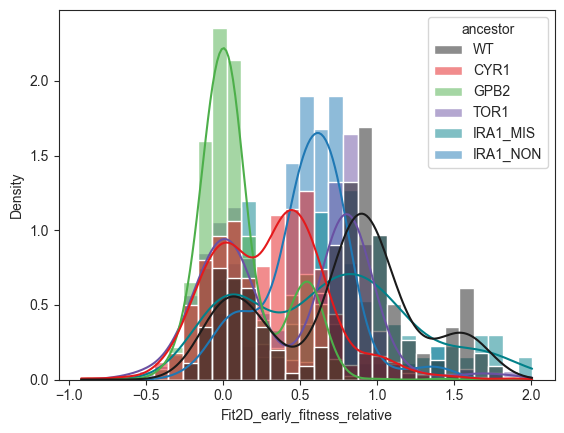

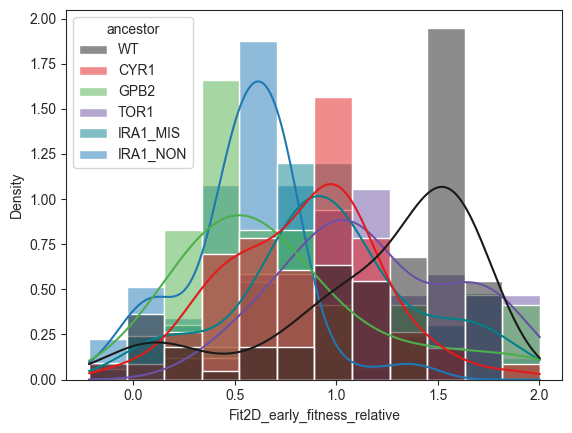

In [3]:
evo_cond_list = ['Evo2D']
anc_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    sns.histplot(this_condition,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    for anc in anc_list:
    
       
        this_pairing = merged_fitness[(merged_fitness['ancestor']==anc) & (merged_fitness['evolution_condition']==evo_cond)]
        pure_diploids = this_pairing[this_pairing['class_new']=='pure_diploids']
        adaptive_nondiploids = this_pairing[~this_pairing['class_new'].isin(['pure_diploids','neutral_haploids'])]
        print(anc,evo_cond,len(this_pairing),len(pure_diploids),len(adaptive_nondiploids))
        
plt.figure()

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    adaptive_nondiploids = this_condition[~this_condition['class_new'].isin(['pure_diploids','neutral_haploids'])]
    sns.histplot(adaptive_nondiploids,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    

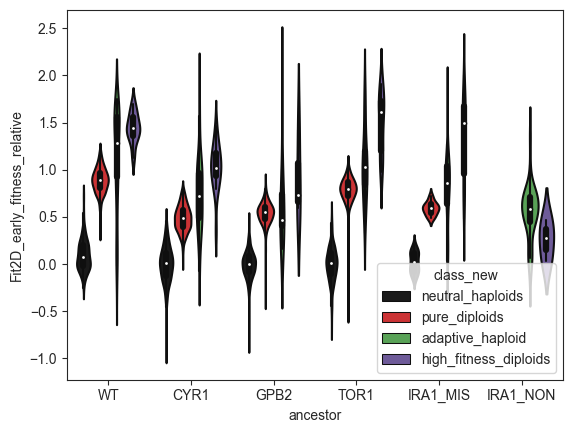

In [4]:
this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]


for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    
    sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitness_relative',
                   hue='class_new',order=anc_list,hue_order=['neutral_haploids','pure_diploids','adaptive_haploid','high_fitness_diploids'],
                   palette=[tools.anc_color_map[anc] for anc in anc_list])
    
#     sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitnes')

#     for anc in anc_list:
        
        

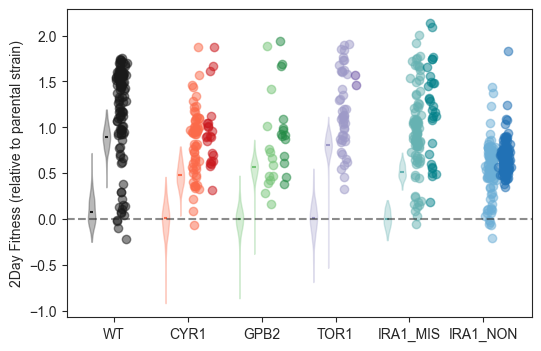

In [56]:
this_df = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]
plt.figure(figsize=(6,4))
to_plot = 'Fit2D_early_fitness_relative'
counter = 0
for anc in anc_list:
    this_anc = this_df[this_df['ancestor']==anc]
    for mut_set in ['neutral_haploids','pure_diploids','Evo2D','Evo3D']:
        if 'Evo' in mut_set:
            this_set = this_anc[this_anc['class_new'].isin(['adaptive_haploid','high_fitness_diploids'])]
            this_set = this_set[this_set['evolution_condition']==mut_set]
            
            plt.scatter([tools.jitter_point(counter) for x in range(len(this_set))],this_set[to_plot],
                       color=tools.anc_evo_cond_color_map[anc][mut_set],alpha=0.5)

        else:
            
            this_set = this_anc[this_anc['class_new'].isin([mut_set])]
            
            if len(this_set) > 0:

#             plt.boxplot(this_set[to_plot],positions=[counter])
                violin_parts = plt.violinplot(this_set[to_plot],positions=[counter],showextrema=False,showmedians=True)
            
                for pc in violin_parts['bodies']:
                    pc.set_facecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    pc.set_edgecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    pc.set_color(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    
                for partname in ['cmedians']:
                    vp = violin_parts[partname]
                    vp.set_edgecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
#                     vp.set_linewidth(1)
            
#             plt.scatter([tools.jitter_point(counter) for x in range(len(this_set))],this_set[to_plot],
#                        color=tools.anc_evo_cond_color_map[anc]['Evo2D'],alpha=0.1)
            
        counter += 1
    
    if 'relative' not in to_plot:
        plt.ylabel('2Day Fitness (relative to ancestor)')
        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

            plt.plot([counter-4.5,counter-0.5],[background_mutant[to_plot].values[0],background_mutant[to_plot].values[0]],
                     color=tools.anc_color_map[anc],alpha=0.5)
    else:
        plt.ylabel('2Day Fitness (relative to parental strain)')
    
    counter += 1



plt.xticks([5*x+1.5 for x in range(len(anc_list))],[anc for anc in anc_list])

plt.axhline(y=0,color='k',linestyle='--',alpha=0.5)

plt.savefig(f'{home_dir}/figures/analysis/fitness/{to_plot}_Evo2D_Evo3D_all.pdf',bbox_inches='tight')

In [8]:
[tools.anc_evo_cond_color_map[anc][evo_cond] for anc in anc_list for evo_cond in ['Evo2D','Evo3D']]

['k',
 'k',
 '#fb6a4a',
 '#cb181d',
 '#74c476',
 '#238b45',
 '#9e9ac8',
 '#6a51a3',
 '#66b2b2',
 '#02818a',
 '#6baed6',
 '#2171b5']